<a href="https://colab.research.google.com/github/mungaimoureen/W6-Football-results-prediction./blob/main/Moringa_Data_Science_Core_W6_Independent_Project_2022_06_Moureen_Mungai_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Football Results Predictions


Football results Prediction

a) Specifying the Data Analysis Question
To create a model to predict the result of a game between team 1 and team 2 using variables, home score and rank, away score and rank and the tournament.

b.) Defining metric for success.

For this analysis to work, our models needs to meet the objective of the task. The model will take on the assumptions of polynomial and logistic regression and give the least RMSE score. The project will be considered successful when the created models are at least 80% accurate in predicting the results of the matches 
  

c.) Understanding the context.
The data in this analysis falls within the context of soccer. The FIFA/Coca-Cola World Ranking was developed over two years during which time a large number of different algorithms was tested and extensively discussed. Throughout this review and consultation process, the main aim was to identify an algorithm that is not only intuitive, easy to understand and improves overall accuracy of the formula, but also addresses feedback received about the previous model and provides fair and equal opportunities for all teams across all confederations to ascend the FWR.

Each of these factors have varying significance in terms of the influence they have in predicting the result of a game between team 1 and team 2, based on who's home and who's away, and the tournament

d.)Project design.
The following steps were implemented

1.) Business Understanding, 

2.)  Acquire the datasets with appropriate data for our project  
3.) Data Exploration

4.) Data Wrangling, performed all data cleaning and preparation to make my data ready for analysis.

5.) EDA, here is where I did my analysis and visualization of the data.

6.) Feature Engineering, preparing my data for modeling.

7.) Model Development.

e.) Data Relevance
The appropriate datasets for this projects are ones that contain data on the results of different matches and the rankings of the teams during those matches


## Importing Libraries

In [ ]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# disable future warnings by running this code
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.reset_option('all')

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



## Loading the Dataset 

In [ ]:
# load dataset with ranking data.
rankings = pd.read_csv('/content/fifa_ranking.csv')

# load dataset with results data.
results = pd.read_csv('/content/results.csv')

## Reading the Datasets
### a. Rankings Dataset

In [ ]:
# preview the top 5 entries of the dataset
rankings.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [ ]:
# check the general information about our dataset
# the information includes the number of entries and columns,
# name and data type of each column,
# number of non-null values in every column,
# distribution of each data type.
rankings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [ ]:
# change data type of 'date' column
rankings['rank_date'] = pd.to_datetime(rankings['rank_date'])
# see change string variable.
type('rank_date')

str

### b. Results Dataset

In [ ]:
# preview top 5 entries of the dataset
results.head()

,date,home_team,away_team,home_score,away_score,tournament
0,1872-11,Scotland,England,0,0,Friendly
1,1873-03,England,Scotland,4,2,Friendly
2,1874-03,Scotland,England,2,1,Friendly
3,1875-03,England,Scotland,2,2,Friendly
4,1876-03,Scotland,England,3,0,Friendly


In [ ]:
# check the general information about our dataset
# the information includes the number of entries and columns, name and data type of each column, number of non-null values in every column, and the distribution of each data type
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        40839 non-null  datetime64[ns]
 1   home_team   40839 non-null  object        
 2   away_team   40839 non-null  object        
 3   home_score  40839 non-null  int64         
 4   away_score  40839 non-null  int64         
 5   tournament  40839 non-null  object        
 6   city        40839 non-null  object        
 7   country     40839 non-null  object        
 8   neutral     40839 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 2.5+ MB


In [ ]:
# change data type of 'date' column
results['date'] = pd.to_datetime(results['date'])
# see the change string variable.
type('date')

str

## Data Cleaning
### a. Rankings dataset

In [ ]:
# check for duplicates in the dataset of type string.
print('Number of duplicates before cleaning: '+str(rankings.duplicated().sum()))

# drop duplicates
rankings = rankings.drop_duplicates()

# confirm that the duplicates have been dropped
print('Number of duplicates after cleaning: ' +str(rankings.duplicated().sum()))

Number of duplicates before cleaning: 0
Number of duplicates after cleaning: 0


In [ ]:
# rename 'country_full' to 'country' and 'rank_date' to 'date'
rankings.rename(columns={'country_full':'country', 'rank_date':'date'}, inplace=True)

In [ ]:
# remove day from date to remain with  year and month data
rankings['date'] = rankings['date'].dt.strftime('%Y-%m')

In [ ]:
# check for missing values in the dataset
rankings.isnull().sum()

rank       0
country    0
date       0
dtype: int64

In [ ]:
# check for anomalies in the 'country' column by scrutinizing its unique values
rankings.country.unique()

array(['Germany', 'Italy', 'Switzerland', 'Sweden', 'Argentina',
       'Republic of Ireland', 'Russia', 'Brazil', 'Norway', 'Denmark',
       'England', 'France', 'Spain', 'Mexico', 'RCS', 'Netherlands',
       'Nigeria', 'Belgium', 'Colombia', 'Poland', 'Romania', 'Uruguay',
       'Portugal', 'Cameroon', 'Zambia', 'Egypt', 'Wales', 'USA',
       "Côte d'Ivoire", 'Scotland', 'Tunisia', 'Greece', 'Morocco',
       'Algeria', 'Ecuador', 'Korea Republic', 'Bulgaria', 'Austria',
       'Costa Rica', 'Northern Ireland', 'Honduras', 'Hungary', 'Japan',
       'Saudi Arabia', 'China PR', 'Canada', 'Finland', 'Ghana', 'Chile',
       'Zimbabwe', 'Qatar', 'Australia', 'Iceland', 'IR Iran',
       'United Arab Emirates', 'Yugoslavia', 'Iraq', 'Senegal', 'Bolivia',
       'Kuwait', 'Korea DPR', 'El Salvador', 'Turkey', 'Gabon', 'Guinea',
       'Thailand', 'Paraguay', 'Malawi', 'Israel', 'Peru', 'Zaire',
       'Cyprus', 'Singapore', 'Mali', 'Malaysia', 'Bermuda', 'Niger',
       'Syria', 'Bahr

There are no anomalies in the 'country' column

In [ ]:
# preview top 5 entries of the cleaned dataset
rankings.head()

,rank,country,date
0,1,Germany,1993-08
1,2,Italy,1993-08
2,3,Switzerland,1993-08
3,4,Sweden,1993-08
4,5,Argentina,1993-08


In [ ]:
# check the number of remaining records after cleaning
rankings.shape

(57756, 3)

### b. Results dataset

In [ ]:
# check for duplicates in the dataset
print('Number of duplicates before cleaning: '+str(results.duplicated().sum()))

# drop duplicates
results = results.drop_duplicates()

# confirm that the duplicates have been dropped
print('Number of duplicates after cleaning: ' +str(results.duplicated().sum()))

Number of duplicates before cleaning: 0
Number of duplicates after cleaning: 0


In [ ]:
# drop the irrelevant columns 
results.drop(['country','neutral', 'city'], axis=1, inplace=True)

In [ ]:
# remove day from date to remain with  year and month data
results['date'] = results['date'].dt.strftime('%Y-%m')

In [ ]:
# convert values in the 'tournament' column to two categories (Friendly and Other)

# create a function that defines the change
def tournament_type (y):
    if y == 'Friendly':
        return 'Friendly'
    return 'Other'
    
# apply the function to the 'tournament' column
results['tournament'] = results['tournament'].apply(lambda y: tournament_type(y))

In [ ]:
# check for missing values in the dataset
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
dtype: int64

In [ ]:
# check for anomalies in the 'home_team' column by scrutinizing the unique values
results.home_team.unique()

array(['Scotland', 'England', 'Wales', 'Northern Ireland',
       'United States', 'Uruguay', 'Austria', 'Hungary', 'Argentina',
       'Belgium', 'France', 'Netherlands', 'Czechoslovakia',
       'Switzerland', 'Sweden', 'Germany', 'Italy', 'Chile', 'Norway',
       'Finland', 'Luxembourg', 'Russia', 'Denmark', 'Catalonia',
       'Basque Country', 'Brazil', 'Japan', 'Paraguay', 'Canada',
       'Estonia', 'Costa Rica', 'Guatemala', 'Spain', 'Brittany',
       'Poland', 'Yugoslavia', 'New Zealand', 'Romania', 'Latvia',
       'Galicia', 'Portugal', 'Andalusia', 'China PR', 'Australia',
       'Lithuania', 'Turkey', 'Central Spain', 'Mexico', 'Aruba', 'Egypt',
       'Haiti', 'Philippines', 'Bulgaria', 'Jamaica', 'Kenya', 'Bolivia',
       'Peru', 'Honduras', 'Guyana', 'Uganda', 'Belarus', 'El Salvador',
       'Barbados', 'Republic of Ireland', 'Trinidad and Tobago', 'Greece',
       'Curaçao', 'Dominica', 'Silesia', 'Guadeloupe', 'Israel',
       'Suriname', 'French Guiana', 'Cuba', 

There are no anomalies in the 'home_team' column

In [ ]:
# check for anomalies in the 'away_team' column by scrutinizing the unique values
results.away_team.unique()

array(['England', 'Scotland', 'Wales', 'Northern Ireland', 'Canada',
       'Argentina', 'Hungary', 'Czechoslovakia', 'Uruguay', 'France',
       'Austria', 'Switzerland', 'Netherlands', 'Belgium', 'Germany',
       'Norway', 'Sweden', 'Italy', 'Chile', 'Catalonia', 'Finland',
       'Russia', 'Luxembourg', 'Denmark', 'Brazil', 'Basque Country',
       'United States', 'Philippines', 'Estonia', 'Provence',
       'El Salvador', 'Costa Rica', 'Paraguay', 'Yugoslavia', 'Poland',
       'Portugal', 'Spain', 'Romania', 'Australia', 'Central Spain',
       'Mexico', 'Galicia', 'Brittany', 'Asturias', 'China PR',
       'New Zealand', 'Latvia', 'Guatemala', 'Curaçao', 'Bulgaria',
       'Lithuania', 'Turkey', 'Egypt', 'South Africa', 'Jamaica', 'Japan',
       'Republic of Ireland', 'Uganda', 'Bolivia', 'Haiti',
       'Trinidad and Tobago', 'Kenya', 'Ukraine', 'Honduras', 'Nicaragua',
       'Greece', 'Guyana', 'Peru', 'Aruba', 'Martinique', 'Barbados',
       'Cuba', 'Israel', 'Indonesia',

There are no anomalies in the 'away_team' column

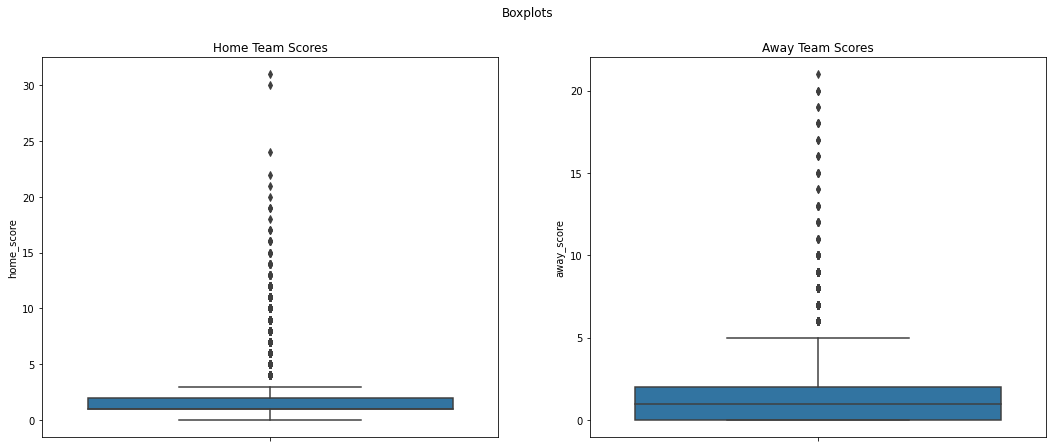

In [ ]:
# check for outliers using boxplots

# specify the size of the figure
fig, ax = plt.subplots(1,2, figsize=(18,7))
# label the figure
fig.suptitle('Boxplots')

# plot the home team scores boxplot
sns.boxplot(data=results, y = "home_score", ax=ax[0])
# label the home team scores boxplot
ax[0].set_title('Home Team Scores')

# plot the home team scores boxplot
sns.boxplot(data=results, y = "away_score", ax=ax[1])
# label the away team scores boxplot
ax[1].set_title('Away Team Scores')

# display the figure
plt.show()

Our outliers in this case cannot be ruled out this is because it is a scores from the teams we will therefore retain them.

In [ ]:
# preview top 5 entries of the cleaned dataset
results.head()

,date,home_team,away_team,home_score,away_score,tournament
0,1872-11,Scotland,England,0,0,Friendly
1,1873-03,England,Scotland,4,2,Friendly
2,1874-03,Scotland,England,2,1,Friendly
3,1875-03,England,Scotland,2,2,Friendly
4,1876-03,Scotland,England,3,0,Friendly


In [ ]:
# check the number of remaining records after cleaning
results.shape

(40839, 6)

## Merging the Datasets

In [ ]:
# merge 'rankings' and 'results' datasets to a variable home_merge to the values of home team, country and date using inner join 
home_merge = pd.merge(results, rankings, how = 'inner' , right_on =['date', 'country'], left_on = ['date', 'home_team'])

# preview the top 5 entries of the merged dataset
home_merge.head()

,date,home_team,away_team,home_score,away_score,tournament,rank,country
0,1993-08,Colombia,Paraguay,0,0,Other,19,Colombia
1,1993-08,Colombia,Argentina,2,1,Other,19,Colombia
2,1993-08,Colombia,Peru,4,0,Other,19,Colombia
3,1993-08,Peru,Argentina,0,1,Other,70,Peru
4,1993-08,Peru,Colombia,0,1,Other,70,Peru


In [ ]:
# rename 'rank' to 'home_team_rank' 
home_merge.rename(columns={'rank':'home_team_rank'},inplace=True)

In [ ]:
# merge 'home_merge' and 'rankings' datasets to a variable matches to values away team, country and date.
matches = pd.merge(home_merge, rankings, how = 'inner' , right_on =['date', 'country'], left_on = ['date', 'away_team'])

# preview the top 5 entries of the merged dataset
matches.head()

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,country_x,rank,country_y
0,1993-08,Colombia,Paraguay,0,0,Other,19,Colombia,67,Paraguay
1,1993-08,Argentina,Paraguay,0,0,Other,5,Argentina,67,Paraguay
2,1993-08,Colombia,Argentina,2,1,Other,19,Colombia,5,Argentina
3,1993-08,Peru,Argentina,0,1,Other,70,Peru,5,Argentina
4,1993-08,Paraguay,Argentina,1,3,Other,67,Paraguay,5,Argentina


In [ ]:
# preview the top 5 records of the dataset
matches.head()

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,country_x,rank,country_y
0,1993-08,Colombia,Paraguay,0,0,Other,19,Colombia,67,Paraguay
1,1993-08,Argentina,Paraguay,0,0,Other,5,Argentina,67,Paraguay
2,1993-08,Colombia,Argentina,2,1,Other,19,Colombia,5,Argentina
3,1993-08,Peru,Argentina,0,1,Other,70,Peru,5,Argentina
4,1993-08,Paraguay,Argentina,1,3,Other,67,Paraguay,5,Argentina


In [ ]:
# check the number of records of dataset
matches.shape

(16918, 10)

In [ ]:
# export the merged dataset as a csv file
matches.to_csv('matches.csv', index=False)

## Data exploration.

In [ ]:
# compute the general statistical summaries of 'home_score' and 'away_score' columns
matches[['home_score', 'away_score']].describe()

,home_score,away_score
count,16918.000000,16918.000000
mean,1.603499,1.068448
std,1.615346,1.244975
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,15.000000


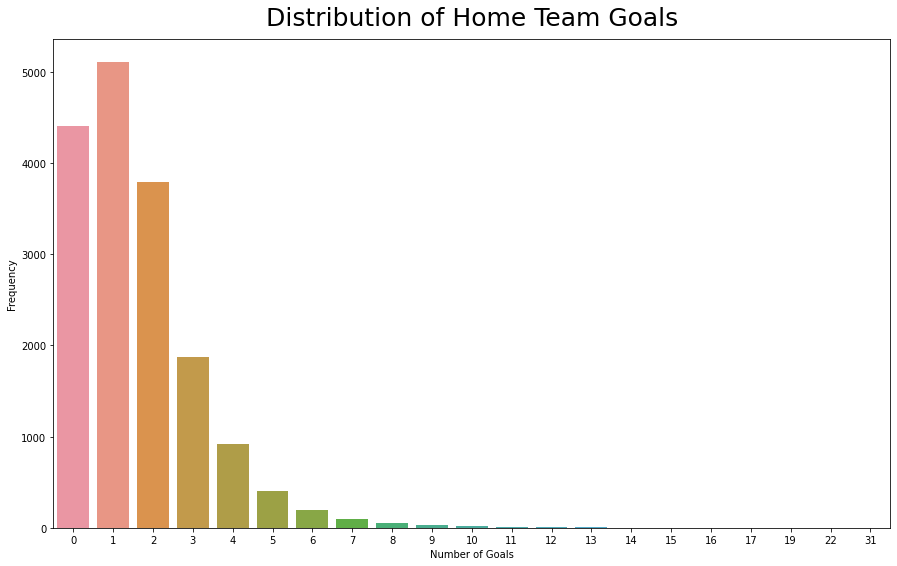

In [ ]:
# visualize the distribution of the home scores.

# specify the size of the chart
plt.figure(figsize = (15, 9))

# plot the count plot
sns.countplot(matches.home_score)

# label the chart
plt.title('Distribution of Home Team Goals', fontsize=25, y=1.015)
# label the x axis
plt.xlabel('Number of Goals')
# label the y axis
plt.ylabel('Frequency')
# display the chart
plt.show()

This shows, teams playing at home chances of scoring goals from 1 were high.

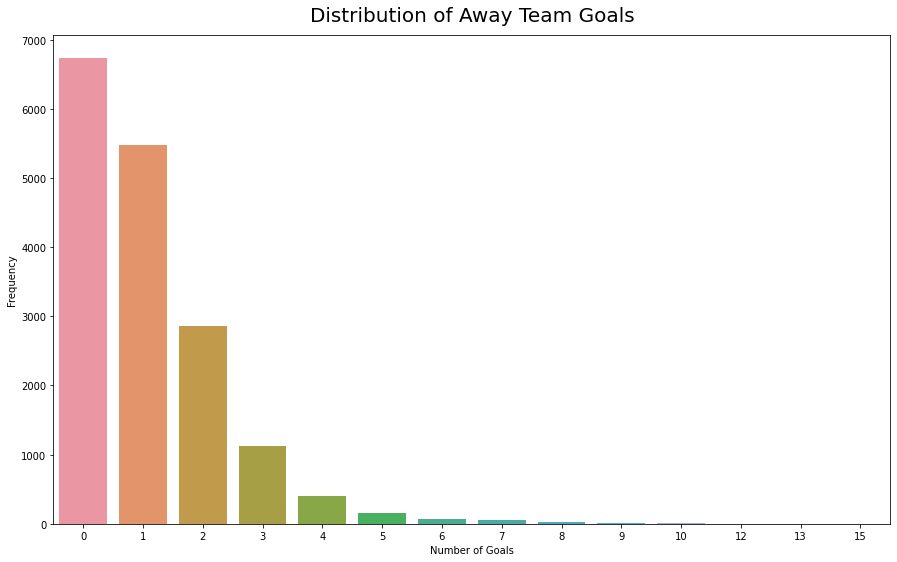

In [ ]:
# visualize the distribution of the away scores using a countplot

# specify the size of the chart
plt.figure(figsize = (15, 9))

# plot the count plot
sns.countplot(matches.away_score)

# label the chart
plt.title('Distribution of Away Team Goals', fontsize=20, y=1.015)
# label the x axis
plt.xlabel('Number of Goals')
# label the y axis
plt.ylabel('Frequency')
# display the chart
plt.show()

This showed when team was playing away chances of not scoring were higher.

Other       0.618867
Friendly    0.381133
Name: tournament, dtype: float64


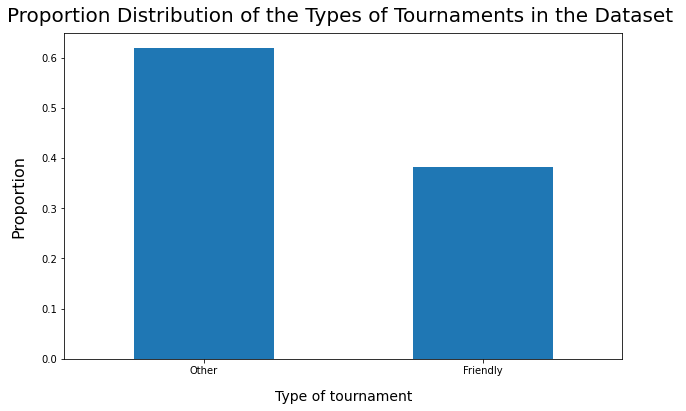

In [ ]:
# plot a bar graph to show the proportions of the types of tournaments 

# display the proportions of the types of tournaments in a frequency table
print(matches.tournament.value_counts(normalize=True))

# specify the size of the figure  
fig, ax = plt.subplots(figsize=(10,6))

# plot the bar graph
(matches['tournament'].value_counts(normalize=True)).plot.bar()

# labelling the bar chart 
plt.title('Proportion Distribution of the Types of Tournaments in the Dataset ', fontsize=20, y=1.015)
# labelling the x axis 
plt.xlabel('Type of tournament', fontsize=14, labelpad=14)
# rotate the labels on the x axis
plt.xticks(rotation = 360)
# labelling the y axis
plt.ylabel('Proportion', fontsize=16, labelpad=15)
#display bar chart
plt.show()

The graph show a comparison between the tournaments played showing friendly matches were fewer compared to the other matches played in the league.

In [69]:
#plot color scaled correlation matrix
corr=matches.corr()
corr.style.background_gradient(cmap='coolwarm')

,home_score,away_score,home_team_rank,rank
home_score,1.000000,-0.163511,-0.134957,0.318973
away_score,-0.163511,1.000000,0.221346,-0.180216
home_team_rank,-0.134957,0.221346,1.000000,0.469861
rank,0.318973,-0.180216,0.469861,1.000000


Basicaly, relation coeffiecients of 0 and few deviations from 0 in both the negative and positive spectrum are deemed weak.

Our matrix shows weak relations of variables.

In [ ]:
# find out the total number of distinct teams to play as a home team
print('The total number of teams to ever play as a home team is ' +str(matches['home_team'].nunique()))

# find out the total number of distinct teams to play as an away team
print('The total number of teams to ever play as an away team is ' +str(matches['away_team'].nunique()))

The total number of teams to ever play as a home team is 193
The total number of teams to ever play as an away team is 193


### Polynomial regression

We will use polynomial regression to create a model that predicts the results of a home team and another model that predicts the results of an away team based on the home team's rank, away team's rank and the tournament's type.  

These features are categorical in nature; therefore, it is unlikely that polynimial regression models will do well in accomplishing the objective of predicting the home teams' and away teams' scores, but we will use them as numerical data just to see how the model will fair   



#### Feature selection and engineering

In [70]:
# make a copy of our dataset
match_copy= matches.copy()

In [71]:
# feature selection
# drop the columns that are irrelevant to our regression model
match_copy.drop(['date','home_team', 'away_team'], axis=1, inplace=True)

In [72]:
# feature engineering
# import label encoder for label encoding
from sklearn.preprocessing import LabelEncoder 
lb=LabelEncoder()

# encode the values in 'tournament' column so that they can be in 0's and 1's 
match_copy['tournament']=lb.fit_transform(match_copy['tournament'].astype(str))

# check how the values have been transformed by comparing with the uncoded values in the original dataset
print(matches.tournament.value_counts())
print(match_copy.tournament.value_counts())

Other       10470
Friendly     6448
Name: tournament, dtype: int64
1    10470
0     6448
Name: tournament, dtype: int64


Other has been encoded as 1 while Friendly has been encoded as 0 

In [73]:
# preview the first entries of the dataframe with our features
match_copy.head()

,home_score,away_score,tournament,home_team_rank,country_x,rank,country_y
0,0,0,1,19,Colombia,67,Paraguay
1,0,0,1,5,Argentina,67,Paraguay
2,2,1,1,19,Colombia,5,Argentina
3,0,1,1,70,Peru,5,Argentina
4,1,3,1,67,Paraguay,5,Argentina


#### Multicollinearity test

In [77]:
# lets put all the independent variables in one subset
independent_variables = match_copy[['tournament', 'home_team_rank', 'rank']]

# find the correlations between the variables
correlations = independent_variables.corr()
correlations

,tournament,home_team_rank,rank
tournament,1.000000,0.094349,0.094754
home_team_rank,0.094349,1.000000,0.469861
rank,0.094754,0.469861,1.000000


According to the pearson correlation values, none of the variables is strongly correlated to another. We will use the correlations above to compute each variance inflation factors to check for multicollinearity.


In [ ]:
# create a dataframe that shows the VIF scores of the variiables
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,tournament,home_team_rank,away_team_rank
tournament,1.012314,-0.064732,-0.065505
home_team_rank,-0.064732,1.287457,-0.598793
away_team_rank,-0.065505,-0.598793,1.287557


The VIF scores show that all the variables are independent of each other.

### Model 1  
The first model will be for predicting the number of goals a home team scores based on the home team's rank, away team's rank and the tournament's type

In [80]:
# Preparing the Data

# divide the data into "attributes" and "labels" by assigning the attributes to variable X and the label to variable y 
W = match_copy[['home_team_rank', 'rank', 'tournament']]
z = match_copy["home_score"]

In [81]:
# import polynomial and linear regression features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# import pipline for creating a pipeline
from sklearn.pipeline import Pipeline

# instantiate the polynomial and linear regression models
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]

# create a pipline and fit it to our data
pipe = Pipeline(Input)
pipe.fit(W,z)

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('modal', LinearRegression())])

In [82]:
# create an array of predicted values based on our attributes
z_pred=pipe.predict(W)

# create a dataframe that compares the actual values to the predicted values
df1 = pd.DataFrame({'Actual': z, 'Predicted': z_pred})
# display top 10 entries in the comparison dataframe
df1

,Actual,Predicted
0,0,2.012797
1,0,2.214534
2,2,1.278425
3,0,0.799616
4,1,0.824855
...,...,...
16913,1,1.308982
16914,4,1.137244
16915,0,0.890305
16916,1,1.582816


In [83]:
# evaluate the algorithm using square root of the mean of the squared errors

# import metrics
from sklearn import metrics

# compute and print the mean of the absolute value of the errors, mean of the squared errors, andsquare root of the mean of the squared errors
print('Mean Absolute Error:', metrics.mean_absolute_error(z, z_pred))
print('Mean Squared Error:', metrics.mean_squared_error(z, z_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(z, z_pred)))

Mean Absolute Error: 1.0378782266949116
Mean Squared Error: 2.010820380721667
Root Mean Squared Error: 1.4180339843324161


The RMSE of a good model should be less than 10% of the mean of the target values.

The mean of home scores is approximately 1.60, meaning that our model with a RMSE of approximately 1.42 (88.75% of the mean of home scores) is not good at predicting the number of goals scored by a home team based on the home team's rank, away team's rank and tournament's type  

#### Adjust Degrees to 6


In [84]:
# instantiate the polynomial and linear regression models with polynomial degrees set as 6
Input=[('polynomial',PolynomialFeatures(degree=6)),('modal',LinearRegression())]

# create a pipline and fit it to our data
pipe = Pipeline(Input)
pipe.fit(W,z)

Pipeline(steps=[('polynomial', PolynomialFeatures(degree=6)),
                ('modal', LinearRegression())])

In [85]:
# create an array of predicted values based on our attributes
z_pred=pipe.predict(W)

# create a dataframe that compares the actual values to the predicted values
df1 = pd.DataFrame({'Actual': z, 'Predicted': z_pred})
# display top 10 entries in the comparison dataframe
df1

,Actual,Predicted
0,0,2.014154
1,0,2.523979
2,2,1.010600
3,0,0.679455
4,1,0.699522
...,...,...
16913,1,1.121747
16914,4,1.187459
16915,0,0.789888
16916,1,1.802564


In [86]:
# evaluate the algorithm using square root of the mean of the squared errors

# import metrics
from sklearn import metrics

# compute and print the mean of the absolute value of the errors, mean of the squared errors, andsquare root of the mean of the squared errors
print('Mean Absolute Error:', metrics.mean_absolute_error(z, z_pred))
print('Mean Squared Error:', metrics.mean_squared_error(z, z_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(z, z_pred)))

Mean Absolute Error: 1.0283680408061568
Mean Squared Error: 1.9663737815649285
Root Mean Squared Error: 1.402274502929055


After adjusting our degrees,

The the RMSE reduced by 0.02 point but it is still too high to consider the model as good.

#### Residual plots


In [87]:
#Step 1
# create the residual by subtracting the test value from the predicted value
residuals = np.subtract(z_pred, z)

#Step 2
# statistical description
residual = pd.DataFrame(residuals).describe()

#Step 3
# compute the mean of the residuals 
residuals.mean()

1.103382126704384e-12

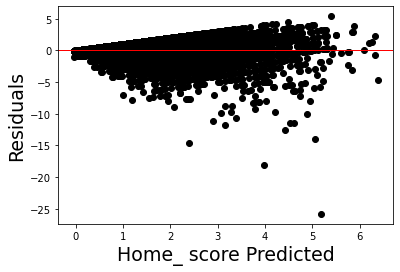

In [88]:
#Step 4
#  We create residual scatter plot of actual vs predicted values
plt.scatter(z_pred, residuals, color = 'black')
plt.ylabel('Residuals', fontsize = 19)
plt.xlabel('Home_ score Predicted', fontsize = 19)
plt.axhline(y = residuals.mean(), color = 'r', linewidth = 1)
plt.show()

Even though there are many residuals around the mean most of rhe residuals are not are round the mean

#### Heteroskedasticity testing

We will perform heteroskedasticity testing using bartlett's test. The test tests the null hypothesis that the variance is equal for all our datapoints,and the new hypothesis that the variance is different for at least one pair of datapoints.

In [89]:
import scipy as sp
# compute the test result and p-value of the test
test_result, p_value = sp.stats.bartlett(z_pred, residuals)

# compute the critical value of the chi squared distribution
degree_of_freedom = len(z_pred)-1
probability = 1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

# If the test_result is greater than the critical value, reject the null hypothesis. 
# This means there are patterns to the variance of the data

# Otherwise, identify no patterns, and  accept the null hypothesis 
# The variance is homogeneous across our data

if(test_result > critical_value):
    print("the variances are unequal, and the model should be reassessed")
else:
    print("The variances are homogeneous!")
    import scipy as sp



The variances are homogeneous!


### Model 2
The second model will be for predicting the number of goals an away team scores based on the home team's rank, away team's rank and the tournament's type

In [90]:
# Preparing the Data

# divide the data into "attributes" and "labels" by assigning the attributes to variable X and the label to variable y 
S = match_copy[['home_team_rank', 'rank', 'tournament']]
t = match_copy["away_score"]

In [91]:
# instantiate the polynomial and linear regression models
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]

# create a pipline and fit it to our data
pipe = Pipeline(Input)
pipe.fit(S,t)

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('modal', LinearRegression())])

In [92]:
# create an array of predicted values based on our attributes
t_pred=pipe.predict(S)

# create a dataframe that compares the actual values to the predicted values
df1 = pd.DataFrame({'Actual': t, 'Predicted': t_pred})
# display top 10 entries in the comparison dataframe
df1

,Actual,Predicted
0,0,0.611150
1,0,0.559196
2,1,1.226242
3,1,1.725037
4,3,1.688279
...,...,...
16913,2,1.157925
16914,2,1.188699
16915,1,1.576381
16916,1,0.952612


In [93]:
# evaluate the algorithm using square root of the mean of the squared errors

# import metrics
from sklearn import metrics

# compute and print the mean of the absolute value of the errors, mean of the squared errors, andsquare root of the mean of the squared errors
print('Mean Absolute Error:', metrics.mean_absolute_error(t, t_pred))
print('Mean Squared Error:', metrics.mean_squared_error(t, t_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(t, t_pred)))

Mean Absolute Error: 0.8466009470167728
Mean Squared Error: 1.2825305121729453
Root Mean Squared Error: 1.1324886366639382


The RMSE of a good model should be less than 10% of the mean of the target values.

The mean of away scores is approximately 1.07, meaning that our model with a RMSE of approximately 1.13 (105.61% of the mean of home scores) is not good at predicting the number of goals scored by an away team based on the home team's rank, away team's rank and tournament's type 



```
# This is formatted as code
```

#### Adjusting Degrees

In [94]:
# instantiate the polynomial and linear regression models with polynomial degrees set as 6
Input=[('polynomial',PolynomialFeatures(degree=6)),('modal',LinearRegression())]

# create a pipline and fit it to our data
pipe = Pipeline(Input)
pipe.fit(S,t)

Pipeline(steps=[('polynomial', PolynomialFeatures(degree=6)),
                ('modal', LinearRegression())])

In [95]:
# create an array of predicted values based on our attributes
t_pred=pipe.predict(S)

# create a dataframe that compares the actual values to the predicted values
df1 = pd.DataFrame({'Actual': t, 'Predicted': t_pred})
# display top 10 entries in the comparison dataframe
df1

,Actual,Predicted
0,0,0.618898
1,0,0.562146
2,1,1.347769
3,1,1.937581
4,3,1.921535
...,...,...
16913,2,1.157893
16914,2,1.180635
16915,1,1.757194
16916,1,0.793061


In [96]:
# evaluate the algorithm using square root of the mean of the squared errors

# import metrics
from sklearn import metrics

# compute and print the mean of the absolute value of the errors, mean of the squared errors, andsquare root of the mean of the squared errors
print('Mean Absolute Error:', metrics.mean_absolute_error(t, t_pred))
print('Mean Squared Error:', metrics.mean_squared_error(t, t_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(t, t_pred)))

Mean Absolute Error: 0.8376308548472134
Mean Squared Error: 1.2470719798997016
Root Mean Squared Error: 1.1167237706343058


After adjusting our degrees,

The RMSE has reduced by approximately 0.02 points but it is still very high for us to consider the model as good

#### Residual plots


In [97]:
#Step 1
# create the residual by subtracting the test value from the predicted value
residuals = np.subtract(t_pred, t)

#Step 2
# statistical description
residual = pd.DataFrame(residuals).describe()

#Step 3
# compute the mean of the residuals 
residuals.mean()

8.72712050922556e-13

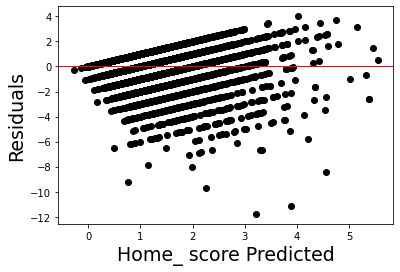

In [98]:
#Step 4
#  We create residual scatter plot of actual vs predicted values
plt.scatter(t_pred, residuals, color = 'black')
plt.ylabel('Residuals', fontsize = 19)
plt.xlabel('Home_ score Predicted', fontsize = 19)
plt.axhline(y = residuals.mean(), color = 'r', linewidth = 1)
plt.show()

Even though there are many residuals around the mean most of rhe residuals are not around the mean.

#### Heteroskedasticity testing

We will perform heteroskedasticity testing using bartlett's test. The test tests the null hypothesis that the variance is equal for all our datapoints,and the new hypothesis that the variance is different for at least one pair of datapoints.

In [99]:
import scipy as sp
# compute the test result and p-value of the test
test_result, p_value = sp.stats.bartlett(t_pred, residuals)

# compute the critical value of the chi squared distribution
degree_of_freedom = len(t_pred)-1
probability = 1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

# If the test_result is greater than the critical value, reject the null hypothesis. 
# This means there are patterns to the variance of the data

# Otherwise, identify no patterns, and  accept the null hypothesis 
# The variance is homogeneous across our data

if(test_result > critical_value):
    print("the variances are unequal, and the model should be reassessed")
else:
    print("The variances are homogeneous!")
    import scipy as sp



The variances are homogeneous!


### **Conclusions**
The nature of the kind of data that we have is not appropriate for building polynomial regression models. The RMSE of 1.42 in our first model and of 1.13 in our second model show that our models are very poor at predicting the scores of the home teams and the away teams. The RMSE values reduced slightly after increasing the polynomial degrees in each model but they were still very high for us to consider the models as good 

### Logistic regression

We will use logistic regression to create a model that predicts the result status of the home team after a match based on the home team's rank, away team's rank and tournament's type.  
  
We will use the dataset that has already been modified in the polynomial regression section above. 

#### Feature engineering and selection

In [100]:
# make a copy of our dataset
matches_copy= matches.copy()

In [101]:
# feature engineering
# import label encoder for label encoding
from sklearn.preprocessing import LabelEncoder 
lb=LabelEncoder()

# encode the values in 'tournament' column so that they can be in 0's and 1's 
matches_copy['tournament']=lb.fit_transform(matches_copy['tournament'].astype(str))

# check how the values have been transformed by comparing with the uncoded values in the original dataset
print(matches.tournament.value_counts())
print(matches_copy.tournament.value_counts())

Other       10470
Friendly     6448
Name: tournament, dtype: int64
1    10470
0     6448
Name: tournament, dtype: int64


Other has been encoded as 1 while Friendly has been encoded as 0 

In [102]:
# add column that shows if a game is a Win, Lose or Draw from the home team’s perspective

# create a function that defines the status of the match
def status (x):
   if x['home_score'] > x['away_score']:
      return 'Win'
   if x['home_score'] < x['away_score']:
      return 'Lose'
   return 'Draw'

# add a new column and apply the function
matches_copy['match_status'] = matches_copy.apply (lambda x: status(x), axis=1)

Win     0.483509
Lose    0.276569
Draw    0.239922
Name: match_status, dtype: float64


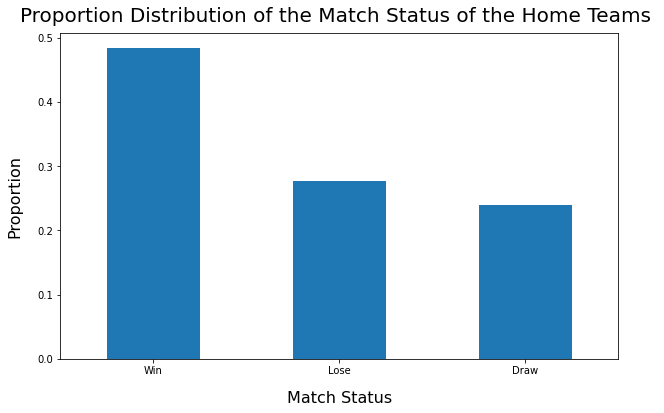

In [103]:
# plot a bar graph to show the proportions of the types of tournaments 

# display the proportions of the types of tournaments in a frequency table
print(matches_copy.match_status.value_counts(normalize=True))

# specify the size of the figure  
fig, ax = plt.subplots(figsize=(10,6))

# plot the bar graph
(matches_copy['match_status'].value_counts(normalize=True)).plot.bar()

# labelling the bar chart 
plt.title('Proportion Distribution of the Match Status of the Home Teams ', fontsize=20, y=1.015)
# labelling the x axis 
plt.xlabel('Match Status', fontsize=16, labelpad=15)
# rotate the labels on the x axis
plt.xticks(rotation = 360)
# labelling the y axis
plt.ylabel('Proportion', fontsize=16, labelpad=15)
#display bar chart
plt.show()

In [104]:
# feature selection
# drop the columns that are irrelevant to our regression model
matches_copy.drop(matches_copy.columns.difference(['home_team_rank', 'away_team_rank', 'tournament','match_status']), 1, inplace=True)


In [105]:
# since the columns contain categorical data (ordinal and nominal) we convert the data type of each column to'category'
matches_copy['tournament'] = matches_copy['tournament'].astype('category')
matches_copy['home_team_rank'] = matches_copy['home_team_rank'].astype('category')
matches_copy['away_team_rank'] = matches_copy['away_team_rank'].astype('category')

In [106]:
# preview the top 5 entries of the modified dataset
matches_copy.head()

,tournament,home_team_rank,away_team_rank,match_status
0,1,19,67,Draw
1,1,5,67,Draw
2,1,19,5,Win
3,1,70,5,Lose
4,1,67,5,Lose


In [107]:
# confirm that the dataset size is sufficient for our model by checking the number of records in the dataset
matches_copy.shape

(16918, 4)

There are 4 predictive features in our dataset and since the rules are that there should be at least 50 records per feature, we will need to have about 200 records in this dataset for it to be sufficient for modelling, But our dataset has 16918 records, therefore sufficient for modelling.

#### Modelling

In [108]:
# Preparing the Data

# divide the data into "attributes" and "labels" by assigning the attributes to variable X and the label to variable y 
X = matches_copy[['home_team_rank', 'away_team_rank', 'tournament']]
y = matches_copy["match_status"]

# Splitting our Data into Training and Test sets

# import train_test_split for the splitting of the data
from sklearn.model_selection import train_test_split

# split this data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify =matches_copy['tournament'], random_state=30)
# the script above splits 80% of the data to training set and 20% of the data to test set while maintaining the same proportions of tournament values

In [109]:
# Training the Algorithm

# import the desired model, in this this case we are importing logistic regression model
from sklearn.linear_model import LogisticRegression

# instantiate the model
model = LogisticRegression()

# train the algorithm by fitting the model to our training data 
model.fit(X_train, y_train)

LogisticRegression()

In [110]:
# Making Predictions

# obtain the trained model's predictions of the 'match_status' based on X_test 
y_pred = model.predict(X_test) # the y_pred is a numpy array that contains all the predicted values

# create a dataframe that compares the actual output values for X_test with the predicted values
df = pd.DataFrame({'Prediction': y_pred, 'Actual': y_test})

# display top 10 records in the comparison dataframe
df.head(10)

,Prediction,Actual
285,Lose,Lose
3872,Lose,Lose
8704,Lose,Lose
5329,Win,Draw
5984,Win,Win
2146,Lose,Lose
1153,Lose,Draw
6695,Win,Draw
2746,Win,Lose
938,Lose,Lose


In [111]:
# Evaluating the Algorithm

# import accuracy_score to be used in testing the accuracy of the algorithm
from sklearn.metrics import accuracy_score

# use accuracy_score function to compute the accuracy of the algorithm by finding the proportion of correct predictions
accuracy = accuracy_score(y_test, y_pred)
# print the accuracy value
print('Accuracy: ', accuracy)

print("")
# An algorithm's performance can also be evaluated using a confusion matrix

# import confusion_matrix to be used in creating a confusion matrix of the predictions
from sklearn.metrics import confusion_matrix

# apply confusion matrix to y_test and y_pred to obtain number of correct and wrong predictions per category
confusion_matrix = confusion_matrix(y_test, y_pred)
# print the matrix
print('Confusion Matrix') 
print(confusion_matrix)

Accuracy:  0.5880614657210402

Confusion Matrix
[[   3  247  529]
 [   3  524  393]
 [   1  221 1463]]


The accuracy test shows that our algorithm is approximately 58.81% accurate in predicting the match status of the home team. The results from the confusion matrix tell us that 1990 (3+524+1463) is the total number of correct predictions and 1394 (247+529+393+221+1+3) is the total number of wrong predictions. (It should be noted that the model did not predict Draws)

In [112]:
# show the classification report of the model

# import classification_report from sklearn.metrics
from sklearn.metrics import classification_report

# apply the imported classification_report to y_test and y_pred to get the classification report of our model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Draw       0.43      0.00      0.01       779
        Lose       0.53      0.57      0.55       920
         Win       0.61      0.87      0.72      1685

    accuracy                           0.59      3384
   macro avg       0.52      0.48      0.42      3384
weighted avg       0.55      0.59      0.51      3384



The classification report shows that the model predicts wins better than losses and draws, and that it is poor at predicting draws. 

#### Hyperparameter tuning

To improve the performance of the model we will perform hyperparameter tuning using grid search

In [113]:
# create and instantiate logistic regression 
logistic = LogisticRegression(solver='newton-cg')

# create penalty regularization space
penalty = ['l1', 'l2', 'none', 'saga']

# create C regularization  space
C = [.001,.01, .1, 1,10,100,1000]

# create a dictionary of all the parameters and their corresponding set of values that we want to test for best performance
hyperparameters = dict(C=C, penalty=penalty)

In [114]:
# import grid search for the tuning
from sklearn.model_selection import GridSearchCV

# create an instance of the GridSearchCV class then pass values for the estimator parameter. 
# the values include the algorithm that we want to execute, the parameter dictionary we have created, the cv parameter which corresponds to number of folds, and finally 
# the n_jobs parameter which refers to the number of CPU's that we want to use for execution. n_jobs=-1 parameter means using all the available computing power.
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0, n_jobs=-1)

In [115]:
# fit the created grid search to the training data
best_model = clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

In [116]:
# view the best values of the hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 0.1


In [117]:
# obtain the tuned model's predictions of the 'match_status' based on X_test 
y_prediction=best_model.predict(X_test)

# create a dataframe that compares the actual output values for X_test with the predicted values
df2 = pd.DataFrame({'Prediction': y_prediction, 'Actual': y_test})# the y_pred is a numpy array that contains all the predicted values

# display top 10 records in the comparison dataframe
df.head(10)

,Prediction,Actual
285,Lose,Lose
3872,Lose,Lose
8704,Lose,Lose
5329,Win,Draw
5984,Win,Win
2146,Lose,Lose
1153,Lose,Draw
6695,Win,Draw
2746,Win,Lose
938,Lose,Lose


In [118]:
# use accuracy_score function to compute the accuracy of the tuned algorithm by finding the proportion of correct predictions
accuracy1 = accuracy_score(y_test, y_prediction)
# print the accuracy value
print('Accuracy: ', accuracy1)

print("")

# import confusion_matrix to be used in creating a confusion matrix of the predictions
from sklearn.metrics import confusion_matrix

# apply confusion matrix to y_test and y_prediction to obtain number of correct and wrong predictions per category
confusion_matrix1 = confusion_matrix(y_test, y_prediction)
# print the matrix
print('Confusion Matrix') 
print(confusion_matrix1)

Accuracy:  0.5880614657210402

Confusion Matrix
[[   5  245  529]
 [   5  523  392]
 [   2  221 1462]]


After hyperparameter tuning the model's accuracy has remained the same at 58.81%. The confusion matrix shows  that the distribution has changed even though the accuracy of the model hasn't. The model is still poor at predicting 'draws'.

In [119]:
# show the classification report of the model

# import classification_report from sklearn.metrics
from sklearn.metrics import classification_report

# apply the imported classification_report to y_test and y_prediction to get the classification report of our tuned model
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

        Draw       0.42      0.01      0.01       779
        Lose       0.53      0.57      0.55       920
         Win       0.61      0.87      0.72      1685

    accuracy                           0.59      3384
   macro avg       0.52      0.48      0.43      3384
weighted avg       0.55      0.59      0.51      3384



The classification report shows that the model is better at predicting wins than it is at predicting losses and draws. The precision in detecting draws has reduced by 1%

#### **Conclusion**  
The nature of our features (ordinal and nominal data) was appropriate  in logistic regression modelling.

However the models' accuracy of approximately 58.81% came below our deisired 80% stated in our success metrics.
 
The model's low predictions of 'draws' is partially low. This could be due to class imbalance that can be balanced in subsequent models. 